# Neural Networks

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Load dataset

In [6]:
def loadMNISTdataset():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    width, height = (x_train.shape[1], x_train.shape[2])

    # Reshape dataset to have a single channel, 
    # converting from integers to floats, and  
    # normalizing they range to [0-1]
    x_train = x_train.reshape(x_train.shape[0], 3*width*height).astype('float32') / 255
    x_test = x_test.reshape(x_test.shape[0], 3*width*height).astype('float32') / 255

    # Converting to one-hot encode for the target values
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train, x_test, y_test, width, height)

label_dict = {    
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [7]:
x_train, y_train, x_test, y_test, width, height = loadMNISTdataset()

Text(0.5, 1.0, 'dog')

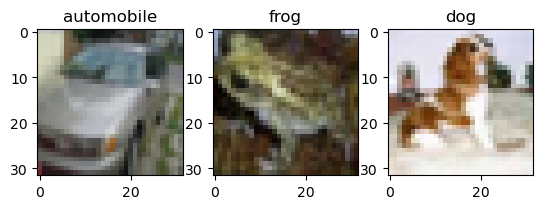

In [65]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(x_train[0, :3*width*height].reshape(width, height, 3))
ax[0].set_title(label_dict[np.argmax(y_train[0, :])])
ax[1].imshow(x_train[1, :3*width*height].reshape(width, height, 3))
ax[1].set_title(label_dict[np.argmax(y_train[1, :])])
ax[2].imshow(x_train[2, :3*width*height].reshape(width, height, 3))
ax[2].set_title(label_dict[np.argmax(y_train[2, :])])

## Defining the model

In [67]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation="relu", input_shape=(3*width*height, )))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Train Model

In [68]:
nEpochs = 100
lrUpdate = 80
batchSize = 32

NValid = int(0.1*x_train.shape[0])
x_valid, y_valid = x_train[:NValid, :], y_train[:NValid, :]
x_train, y_train = x_train[NValid:, :], y_train[NValid:, :]

In [69]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [70]:
def plotTrainingHistory(history):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='gray', label='test')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='orange', label='train')
    plt.plot(history.history['val_accuracy'], color='gray', label='test')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Epoch 1/80
491/491 [==============================] - 3s 6ms/step - loss: 2.1879 - accuracy: 0.1799 - val_loss: 2.0301 - val_accuracy: 0.2496
Epoch 2/80
491/491 [==============================] - 2s 5ms/step - loss: 2.0045 - accuracy: 0.2622 - val_loss: 1.9168 - val_accuracy: 0.2989
Epoch 3/80
491/491 [==============================] - 2s 5ms/step - loss: 1.9273 - accuracy: 0.3005 - val_loss: 1.8575 - val_accuracy: 0.3253
Epoch 4/80
491/491 [==============================] - 2s 5ms/step - loss: 1.8686 - accuracy: 0.3247 - val_loss: 1.8069 - val_accuracy: 0.3414
Epoch 5/80
491/491 [==============================] - 2s 5ms/step - loss: 1.8245 - accuracy: 0.3465 - val_loss: 1.8140 - val_accuracy: 0.3460
Epoch 6/80
491/491 [==============================] - 3s 6ms/step - loss: 1.7850 - accuracy: 0.3568 - val_loss: 1.7817 - val_accuracy: 0.3534
Epoch 7/80
491/491 [==============================] - 3s 6ms/step - loss: 1.7577 - accuracy: 0.3653 - val_loss: 1.7513 - val_accuracy: 0.3655
Epoch 

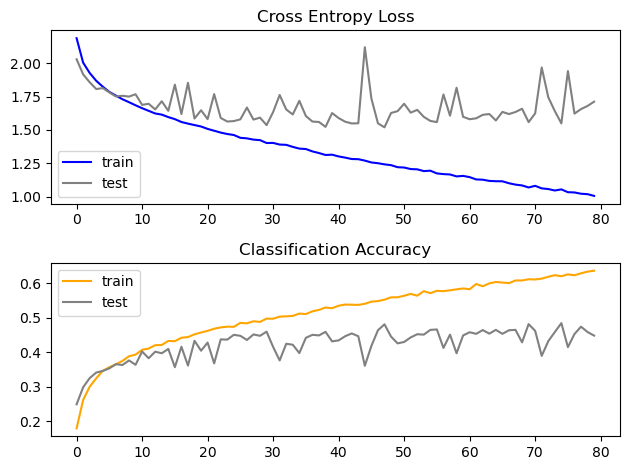

Epoch 81/100
491/491 [==============================] - 3s 7ms/step - loss: 0.8879 - accuracy: 0.6822 - val_loss: 1.5652 - val_accuracy: 0.4934
Epoch 82/100
491/491 [==============================] - 3s 6ms/step - loss: 0.8649 - accuracy: 0.6917 - val_loss: 1.5647 - val_accuracy: 0.4854
Epoch 83/100
491/491 [==============================] - 3s 6ms/step - loss: 0.8620 - accuracy: 0.6902 - val_loss: 1.5738 - val_accuracy: 0.4917
Epoch 84/100
491/491 [==============================] - 4s 8ms/step - loss: 0.8505 - accuracy: 0.6946 - val_loss: 1.5763 - val_accuracy: 0.4905
Epoch 85/100
491/491 [==============================] - 4s 7ms/step - loss: 0.8525 - accuracy: 0.6994 - val_loss: 1.5832 - val_accuracy: 0.4894
Epoch 86/100
491/491 [==============================] - 3s 7ms/step - loss: 0.8471 - accuracy: 0.6971 - val_loss: 1.5860 - val_accuracy: 0.4928
Epoch 87/100
491/491 [==============================] - 4s 7ms/step - loss: 0.8516 - accuracy: 0.6934 - val_loss: 1.5820 - val_accuracy:

In [71]:
history = model.fit(x_train, y_train, epochs=lrUpdate, batch_size=batchSize,
                    validation_data=[x_valid, y_valid])

plotTrainingHistory(history=history)

optimizer.learning_rate.assign(0.001)

history = model.fit(x_train, y_train, initial_epoch=lrUpdate, epochs=nEpochs, batch_size=batchSize,
                    validation_data=[x_valid, y_valid])

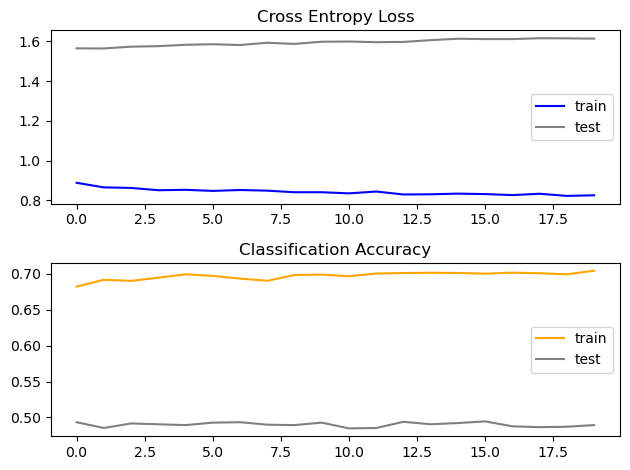

In [72]:
plotTrainingHistory(history=history)

## Test the model

In [73]:
def showErrors(model, x_test, y_test, width, height):
    y_hat = np.argmax(model.predict(x_test), axis=-1)
    y_test_array = y_test.argmax(1)
    test_wrong = [im for im in zip(x_test,y_hat,y_test_array) if im[1] != im[2]]
    accuracy = 1 - len(test_wrong)/x_test.shape[0]
    plt.figure(figsize=(15, 15))
    plt.suptitle(f"accuracy = {accuracy:.3f}")
    for ind, val in enumerate(test_wrong[:20]):
        plt.subplot(10, 10, ind + 1)

        predictLabel = label_dict[val[1]]
        correctLabel = label_dict[val[2]]

        im = val[0].reshape((width,height,3))
        plt.axis("off")
        plt.text(0, -0.5, correctLabel, fontsize=14, color='green') # correct
        plt.text(0, -5.0, predictLabel, fontsize=14, color='red')  # predicted

        plt.imshow(im, cmap='gray')
    plt.tight_layout()
    plt.show()

313/313 [==============================] - 1s 2ms/step


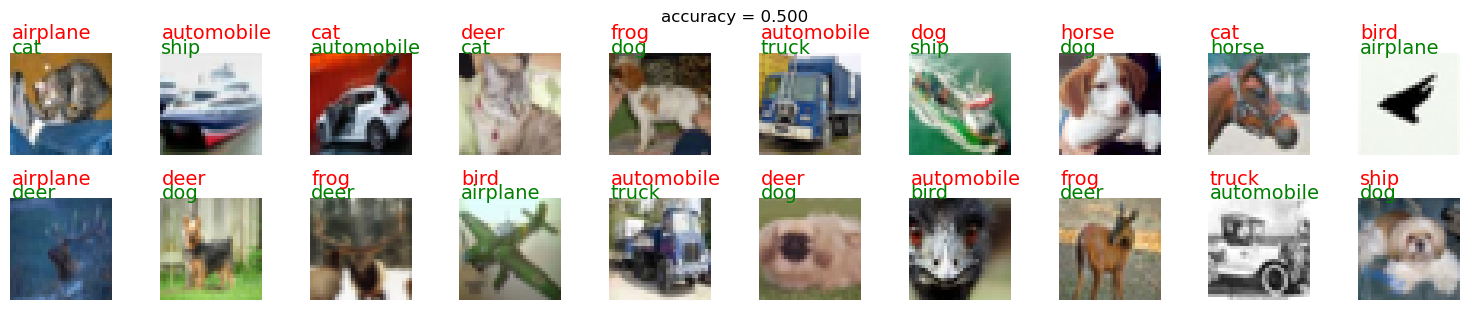

In [74]:
showErrors(model, x_test, y_test, width, height)